In [1]:
# Question 1: Which cities love avocados most?

#Task 1: popularity of avocado, visual heatmap, 2015 to 2020, bar graph of volume per area 

In [1]:
#import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
#read initial csv into a dataframe
csv_file = 'Main Avocado Tree (Resources)/avocado-updated-2020.csv'
avocado_df = pd.read_csv(csv_file)
avocado_df

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico


##Trying to use the avocado data to get the full geography data 

In [14]:
avocado_cities=avocado_df[avocado_df.geography != 'Total U.S.']
bad_geos = ['Baltimore/Washington', 'Buffalo/Rochester', 'California', 'Cincinnati/Dayton', 'Dallas/Ft. Worth', 'Harrisburg/Scranton', 'Hartford/Springfield', 'Miami/Ft. Lauderdale', 'Midsouth', 'New Orleans/Mobile', 'Northeast', 'Northern New England', 'Phoenix/Tucson','Raleigh/Greensboro', 'Richmond/Norfolk', 'Southeast', 'West', 'West Tex/New Mexico', 'Great Lakes', 'South Central', 'Plains']


In [15]:
new_avocado = avocado_cities[~avocado_cities['geography'].isin(bad_geos)]
new_avocado

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta
6,2015-01-04,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.00,conventional,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33034,2020-11-29,1.84,5898.33,677.71,912.70,0.00,4307.92,4301.25,6.67,0.00,organic,2020,St. Louis
33035,2020-11-29,0.95,72128.91,6789.51,31201.09,627.87,33510.44,20587.54,11866.23,1056.67,conventional,2020,Syracuse
33036,2020-11-29,1.46,3191.59,166.36,89.78,0.00,2935.45,2618.57,316.88,0.00,organic,2020,Syracuse
33037,2020-11-29,0.65,562437.35,230468.94,15289.83,44.60,316633.98,251658.97,64927.71,47.30,conventional,2020,Tampa


In [16]:
#Changing Date to ONLY reflect the month
split_col = new_avocado['date'].str.split('-',expand=True)
split_col.columns = [f'Split-{i}' for i in range(3)]
newer_avocado = new_avocado.join(split_col)
newer_avocado

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,Split-0,Split-1,Split-2
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany,2015,01,04
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany,2015,01,04
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta,2015,01,04
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta,2015,01,04
6,2015-01-04,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.00,conventional,2015,Boise,2015,01,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33034,2020-11-29,1.84,5898.33,677.71,912.70,0.00,4307.92,4301.25,6.67,0.00,organic,2020,St. Louis,2020,11,29
33035,2020-11-29,0.95,72128.91,6789.51,31201.09,627.87,33510.44,20587.54,11866.23,1056.67,conventional,2020,Syracuse,2020,11,29
33036,2020-11-29,1.46,3191.59,166.36,89.78,0.00,2935.45,2618.57,316.88,0.00,organic,2020,Syracuse,2020,11,29
33037,2020-11-29,0.65,562437.35,230468.94,15289.83,44.60,316633.98,251658.97,64927.71,47.30,conventional,2020,Tampa,2020,11,29


In [17]:
#make it pretty
final_avocado = newer_avocado.rename(columns={'Split-1':'month', 'geography':'city'})
clean_avocado = final_avocado[['month', 'year', 'city', 'average_price', 'total_volume', '4046', '4225', '4770', 'type']]
clean_avocado.head()

,month,year,city,average_price,total_volume,4046,4225,4770,type
0,01,2015,Albany,1.22,40873.28,2819.50,28287.42,49.90,conventional
1,01,2015,Albany,1.79,1373.95,57.42,153.88,0.00,organic
2,01,2015,Atlanta,1.00,435021.49,364302.39,23821.16,82.15,conventional
3,01,2015,Atlanta,1.76,3846.69,1500.15,938.35,0.00,organic
6,01,2015,Boise,1.01,80034.32,44562.12,24964.23,2752.35,conventional


In [18]:
grouped_year_city = pd.DataFrame(clean_avocado.groupby(["city", "year"]).mean().round(2))
grouped_year_city

average_price  total_volume       4046      4225     4770
city   year                                                           
Albany 2015           1.54      38749.00     534.97  30959.87   334.40
       2016           1.53      50618.61    2717.87  39807.86    32.30
       2017           1.64      49354.55    1608.51  39712.43   151.47
       2018           1.45      64017.27    5076.33  47879.76    49.18
       2019           1.43      62896.96    2294.52  51627.03   135.17
...                    ...           ...        ...       ...      ...
Tampa  2016           1.26     208468.74   89255.50  47830.63    48.57
       2017           1.62     193869.22  113704.23  27695.45   111.01
       2018           1.31     273352.89  167546.43  20813.41   710.79
       2019           1.14     299179.74  117290.64   9835.28  1611.04
       2020           1.09     326690.70  133730.07  10688.41   251.75

[192 rows x 5 columns]

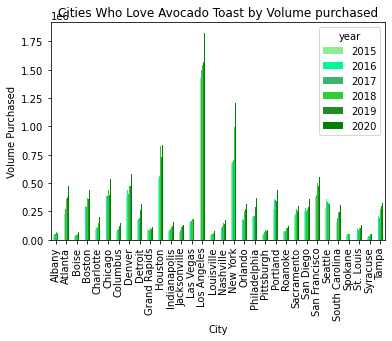

In [22]:
grouped_year_city['total_volume'].unstack().plot(kind='bar', color=('lightgreen', 'mediumspringgreen', 'mediumseagreen', 'limegreen', 'forestgreen', 'green'))
plt.xlabel("City")
plt.xticks(rotation=90)
plt.ylabel("Volume Purchased")
plt.title("Cities Who Love Avocado Toast by Volume purchased")

plt.show()

In [ ]:

grouped_year_city['total_volume'].unstack().plot(kind='bar', color=('lightgreen', 'mediumspringgreen', 'mediumseagreen', 'limegreen', 'forestgreen', 'green'))
plt.xlabel("City")
plt.xticks(rotation=90)
plt.ylabel("Volume Purchased")
plt.title("Cities Who Love Avocado Toast by Volume purchased")

plt.show()